# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb) including user ratings and revenue. It has 21 columns and 10866 rows.

### Question(s) for Analysis

1. How the popularity of the movies are affected through time?
2. What features are associated with movies that have high revenues?
3. What are the most 5 popular movies in 2015?
4. What are the highest 10 movies in 2015 according to the revenue?
5. What are the most frequent words used in the overview and keywords for the most popular movies?


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

# Install regex in case if it won't be imported successfully.
!pip install regex

    100% |████████████████████████████████| 675kB 4.7MB/s eta 0:00:01


In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from wordcloud import WordCloud
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load the data, check for cleanliness, get some high level overview about the data and then trim and clean the dataset for analysis.

In [5]:
# Load data and print head
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Get descriptive statistics.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Note: 
1. The oldest movie in this dataset is since 1960, however, the newest ones are released in 2015
2. Min run time is zero which seems to be incorrect indicator.
3. 75% of the revenue column in the dataset has less than 24M. However the max value is approx. 2B which is really high!

In [7]:
# Check the size of the data
print('Number of rows in the dataset is: {}'.format(df.shape[0]))
print('Number of columns in the dataset is: {}'.format(df.shape[1]))

Number of rows in the dataset is: 10866
Number of columns in the dataset is: 21


In [8]:
# Check the types of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

##### Note:
release_date column is defined as string in the dataset and not datetime (eligible for modification). On the otherhand, release_year is int which is a valid/healthy option.

In [9]:
# Check duplicate rows
print("Number of duplicated rows are:", df.duplicated().sum())

Number of duplicated rows are: 1


This duplicated row can be safely removed in the data cleaning phase.

In [10]:
# Check for missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Check if some movies has revenue of zeros
print('{} rows has zero revenue values.'.format(df['revenue'].value_counts()[0]))
print('{} rows has zero runtime values.'.format(df['runtime'].value_counts()[0]))

6016 rows has zero revenue values.
31 rows has zero runtime values.


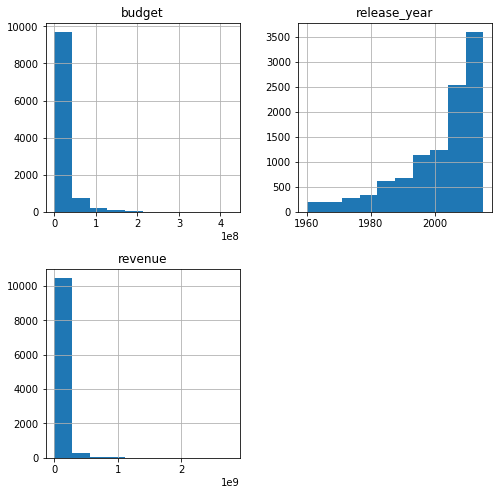

In [12]:
df[['budget', 'revenue', 'release_year']].hist(figsize=(8, 8));

#### Conclusion of the Data Wrangling:
1. There are several columns which we don't need for our analysis purposes.(i.e. imdb_id, homepage)
2. There are around 6016 rows of zero revenue. (More than 50% of our total data sample!)
3. The column with the most missing values are homepage URLs which is not necessary for our analysis purposes. 
4. We have only 1 duplicate row which can be removed.
5. Keep in mind that the runtime is zero in 31 rows of the sample.
6. Keep in mind the large distribution in the revenue column.
7. The release year is right skewed which means that more movies are released with time.


### Data Cleaning
In this section we will prepare the data to be able to do the necessary analysis.

1- Remove the duplicates

In [13]:
# Remove the duplicate row
df.drop_duplicates(inplace=True)

# Check the shape now -- Should have 10865 rows 
df.shape

(10865, 21)

2- Drop rows with zero revenue

In [14]:
# Drop rows with 0 revenue
df = df[df['revenue'] != 0]

# Check the shape now -- Should have 10865-6016 = 4849 rows 
df.shape

(4849, 21)

In [15]:
# Remove the unnecessary columns for our analysis.
remove_columns = ['imdb_id', 'homepage','director', 'tagline', 'release_date']
df.drop(remove_columns, axis=1, inplace=True)

# Check the shape now -- Should have 16 columns now
df.shape

(4849, 16)

##### Note:
We have removed duplicates, rows with zeros and unnecessary columns.
In the next step, we would like to see more low level details about the revenue column and transform it to reasonable interval (Smaller distribution of values).

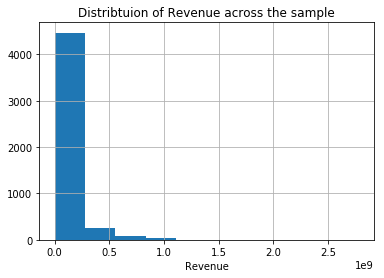

In [16]:
# Detect outlier of revenue column

plt.hist(df['revenue'])
plt.xlabel('Revenue')
plt.title('Distribtuion of Revenue across the sample')
plt.grid(True)
plt.show()

In [17]:
# Define min and max thresholds to filter the data
min_threshold, max_threshold = df.revenue.quantile([0.05, 0.9])
min_threshold, max_threshold

(139676.00000000003, 232045965.59999993)

##### Note 
1. Max is approx. 232M which is is a bit reasonable now. 
2. We have done this step as to limit a bit the big distribution in the original dataset.

In [18]:
# What data points has that lower values than the threshold
df[df.revenue < min_threshold].head(5)

,id,popularity,budget,revenue,original_title,cast,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,81,5.5,2015,0.000000e+00,42223.381422
109,336004,1.449072,8900000,50136,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,casino|robbery|bus hijacking|heist,A father is without the means to pay for his d...,93,Crime|Action|Thriller,Emmett/Furla Films|Silver Plane Films|Mass Hys...,233,5.4,2015,8.187996e+06,46125.099705
139,193687,1.161812,0,118483,Z for Zachariah,Margot Robbie|Chiwetel Ejiofor|Chris Pine,love triangle|based on novel|jealousy|radiatio...,"In the wake of a nuclear war, a young woman su...",97,Drama|Science Fiction|Thriller,Palomar Pictures|Lucky Hat Entertainment|Silve...,181,5.5,2015,0.000000e+00,109004.312038
171,248574,0.880268,0,6075,Barely Lethal,Hailee Steinfeld|Sophie Turner|Jessica Alba|Sa...,assassin|high school,A 16-year-old international assassin yearning ...,96,Adventure|Action|Comedy,A24,215,5.5,2015,0.000000e+00,5588.997541
173,326425,0.872149,0,16775,Extraction,Bruce Willis|Gina Carano|Kellan Lutz|D. B. Swe...,terrorist|kidnapping|ex cia agent|rescue opera...,A former CIA operative is kidnapped by a group...,83,Action|Thriller,Emmett/Furla Films|Oasis Films|Aperture Entert...,57,4.2,2015,0.000000e+00,15432.993209


In [19]:
# What data points has that higher values than the threshold
df[df.revenue > max_threshold].head(5)

,id,popularity,budget,revenue,original_title,cast,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Note: 
1. This is not necessarly data errors or not valid, but if we keep these data points they will surely affect our analysis in certain bias direction.

In [20]:
df = df[(df['revenue'] < max_threshold) & (df['revenue'] > min_threshold)]

In [21]:
df.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      3
keywords                193
overview                  0
runtime                   0
genres                    0
production_companies     69
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

##### Note:
We removed the row that has missing values to complete the cleaning of the data.

In [22]:
# Drop rows that has missing values
df.dropna(axis=0, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis
Now that we've trimmed and cleaned your data, We're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that was posed in the Introduction section.


### 1. How the popularity of the movies are affected through time?

In [23]:
# Group data by year and get the median in terms of Popularity
df_pop = df.groupby('release_year').median()['popularity']
df_pop_index = df_pop.index
x, y = df_pop_index, df_pop

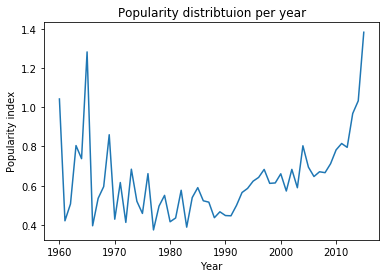

In [24]:
# Plot configs.
plt.plot(x, y)
plt.title('Popularity distribtuion per year')
plt.xlabel('Year')
plt.ylabel('Popularity index')
plt.show()

### 2. What features are associated with movies that have high revenues?

In this section we will investigate what are the main factors affecting the revenue through all the dataset.

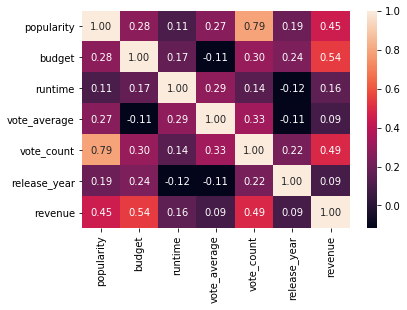

In [25]:
#Visualise the coorelation matrix between the revenue and other features
cols = ['popularity', 'budget', 'runtime', 'vote_average', 'vote_count', 'release_year', 'revenue']

heatmap = sns.heatmap(df[cols].corr(), annot=True, fmt='.2f')
#Plot and save
fig = heatmap.get_figure()

In [26]:
# Get DataFrame for only 2015
df_2015 = df[df['release_year'] == 2015]

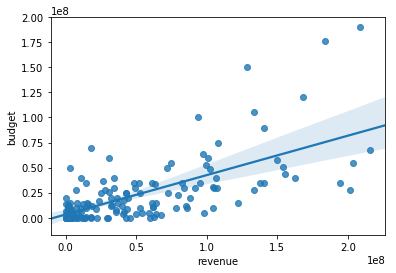

In [27]:
# Validate the coorelation across different features for the 2015 dataset
sns.regplot(x=df_2015['revenue'], y=df_2015['budget'])

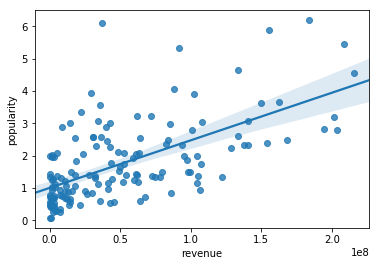

In [28]:
# Check the coorelation with respect to popularity 
sns.regplot(x=df_2015['revenue'],  y=df_2015['popularity'])

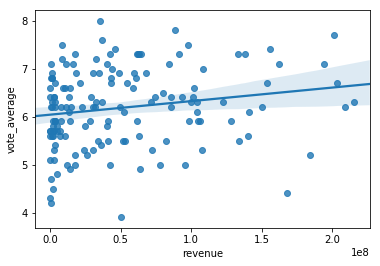

In [29]:
# Check the coorelation with respect to popularity 
sns.regplot(x=df_2015['revenue'],  y=df_2015['vote_average'])

##### Conclusion:
1. From the above diagrams, it is proven that the revenue is accompined with high popularity and high budget.


### 3. What are the most 5 popular movies in 2015?

Get the highest 5 movies according to popularity.

In [30]:
# Use the same df_2015 from the above section
# Sort the values by popularity

df_2015_popularity = df_2015[['popularity','original_title']].sort_values(by='popularity', ascending=False)

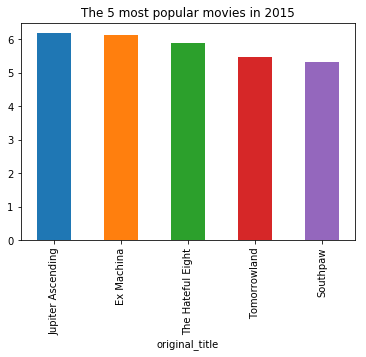

In [31]:
# Plot the first 5 in the DF
df_2015_popularity[0:5].plot(kind='bar', x='original_title', y='popularity', 
                             rot=90, title='The 5 most popular movies in 2015', legend=False)

### 4. What are the highest 10 movies in 2015 according to the revenue?

In [32]:
# Get the highest 10 movies in 2015 according to the revenue
df_2015_revenue = df_2015[['revenue','original_title', 'budget']].sort_values(by='revenue', ascending=False)

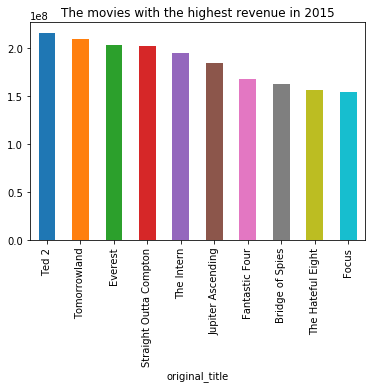

In [33]:
df_2015_revenue[0:10].plot(kind='bar', x='original_title', y='revenue', rot=90, 
                           title='The movies with the highest revenue in 2015', legend=False)

##### Conclusion:
From the above diagrams we can conclude:
1. Jupiter Ascending, Ex machina, The Hateful Eight, Tomorrowland and Southpaw are the most popular movies in 2015.
2. Ted 2 comes in the first placewith above 200M of revenue.

### 5. What are the most frequent words used in the overview and keywords for the most popular movies?

In [34]:
# Define the wordcloud DataFrame
df_word_cloud = df_2015.sort_values('popularity', ascending=False)[0:10]

In [35]:
# Create helper functions for cleaning the text and generate wordclouds.

def clean_text(df, column):
    '''
    function to clean raw text from the column in the DF.
    
    inputs:
        df: Pandas DataFrame which has the column to be cleaned.
        column: str - column name in the df
    return:
        text_cleaned: string which has the text that can be converted to wordcloud.
    '''
    text_raw = df[column].values
    text_raw = np.array_str(text_raw)
    text_cleaned = re.sub("[^A-Za-z0-9]"," ",text_raw)
    return text_cleaned

def generate_wordcloud(text_cleaned):
    '''
    function to generate and plot the wordcloud from the text input.
    inputs:
        text_cleaned:
    '''
    wordcloud = WordCloud().generate(text_cleaned)
    plt.figure(figsize = (15, 15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

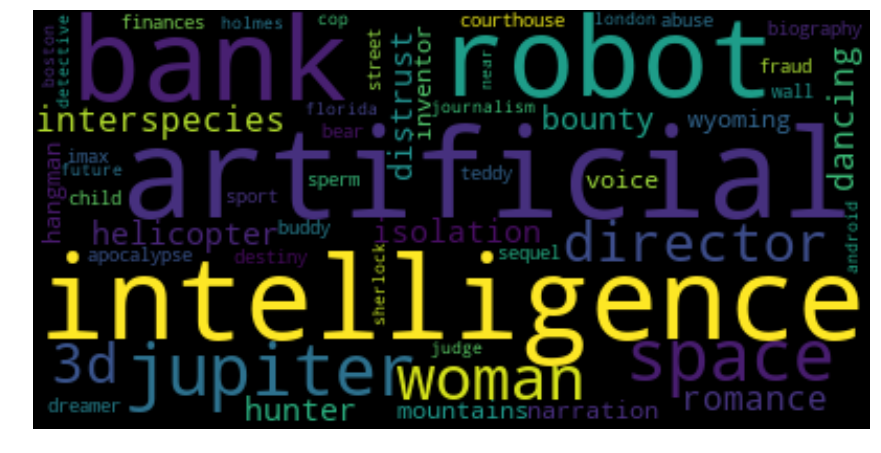

In [36]:
# Use the clean_text function to clean the text in keywords column.
keywords_text = clean_text(df_word_cloud, 'keywords')

# Use the generate wordcloud function to plot the image.
generate_wordcloud(keywords_text)

##### Note:
1. You can see that in the overview, the most used words in the keywords column are: Aritifcial, robot, bank, intelligence, woman, romance.

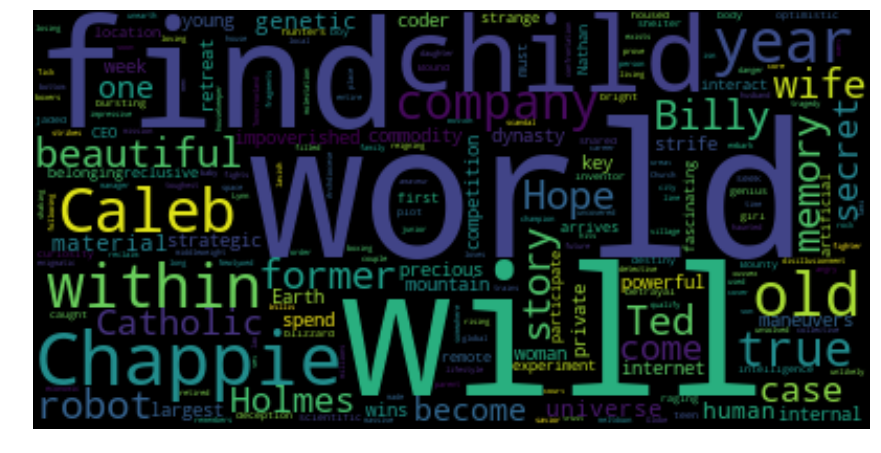

In [37]:
# Use the clean_text function to clean the text in overview column
overview_text = clean_text(df_word_cloud, 'overview')

# Use the generate wordcloud function to plot the image
generate_wordcloud(overview_text)

##### Note:
1. You can see that in the overview, the most used words are: World, Child, memory, old, wife, which all seems to me like a genre of Action, thriller and Scify.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

Results:

1. It looks that popularity index of the movies are increasing over years.
2. Find, Child, Robot, Artificial, Intelligence are most common words in the movies which gives a bit of idea how the most popular movies tends to be.
3. Ted 2 is the highest revenue movie in 2015. 
4. Revenue seems to be positively coorelate with the popularity and budget features.
5. Avatar has the highest revenue in the dataset with value over 2B.

Future Work:

1. More text analysis can be done over the cast and production_companies columns.
2. Runtime column can be used to see if it affects the popularity. (i.e. When the movie is long, is it more popular?)


### Limitations

1. Due to lack of knowledge in the movie industry from the business prespective, there wasn't much a constructive decision for what can be considered outliers in terms of revenue and budget.

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0